In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

**Data Loading / Preprocessing:**

i. Loading

In [4]:
df=pd.read_csv('housing.csv')

In [5]:
df.shape

(20640, 10)

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df=df.dropna()
df.shape

(20433, 10)

In [8]:
#finding pearson correlation
corr_df=df.drop(['latitude','longitude','ocean_proximity'],axis=1)
result=corr_df.corrwith(corr_df['median_house_value'],axis=0,method='pearson')
result.drop(labels=['median_house_value'],inplace=True)
result=result.to_frame().reset_index()
result.rename(columns = {'index':'Feature Name',0:'Pearson Correlation'},
          inplace = True)
result

,Feature Name,Pearson Correlation
0,housing_median_age,0.106432
1,total_rooms,0.133294
2,total_bedrooms,0.049686
3,population,-0.025300
4,households,0.064894
5,median_income,0.688355


In [9]:
X=df.drop(['median_house_value'],axis=1)
Y=df['median_house_value']

ii. Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32a699c6a0>,
      dtype=object)

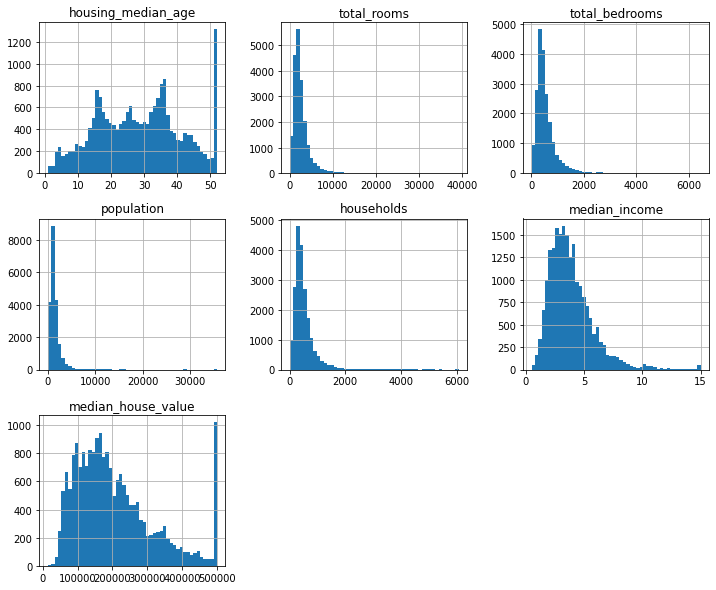

In [10]:
corr_df.hist(column=['housing_median_age', 'total_rooms', 'total_bedrooms','population','households','median_income','median_house_value'],bins = 50,figsize=(12, 10))

In [11]:
corr_df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
X=pd.get_dummies(X,columns=['ocean_proximity'])
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


iii. Data Spliting

In [13]:
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.3)

iv. Data Scaling

In [14]:
#scalling data using standardscaler
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

In [15]:
X_train=pd.DataFrame(scaler_X.fit_transform(X_train), columns=X_train.columns)

In [16]:
X_test=pd.DataFrame(scaler_X.transform(X_test), columns=X_test.columns)

In [17]:
y_train=pd.DataFrame(scaler_Y.fit_transform(pd.DataFrame(y_train)),columns=['median_house_value'])

In [18]:
y_test=pd.DataFrame(scaler_Y.transform(pd.DataFrame(y_test)),columns=['median_house_value'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32a6340070>,
      dtype=object)

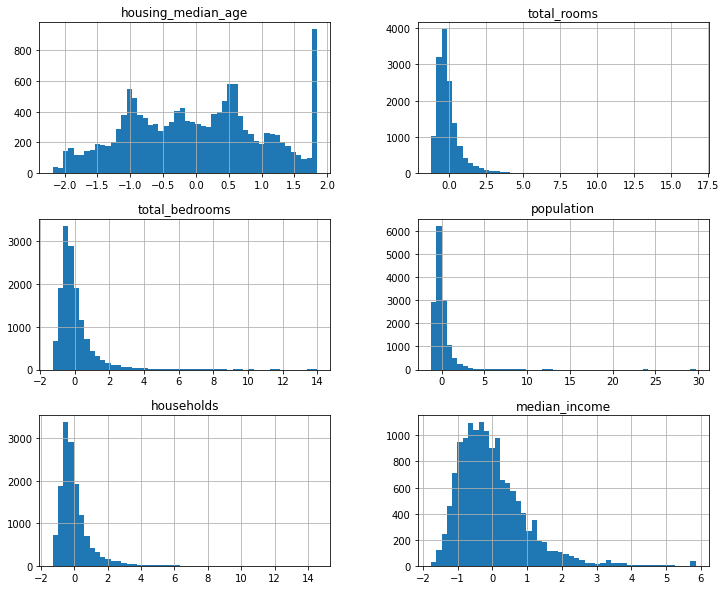

In [19]:
X_train.hist(column=['housing_median_age', 'total_rooms', 'total_bedrooms','population','households','median_income'],bins = 50,figsize=(12, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32a5a29af0>]],
      dtype=object)

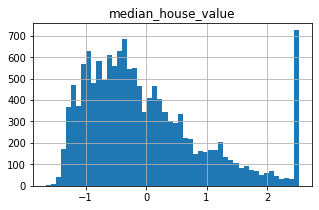

In [20]:
y_train.hist(bins = 50,figsize=(5, 3))

**Modeling**

In [21]:
#creating linearRegression model 
regression = LinearRegression()

In [22]:
#fitting data in the model
regression.fit(X_train,y_train)

LinearRegression()

In [23]:
#predicting from test data
y_preds=regression.predict(X_test)

In [24]:
#transforming to original value 
y_preds=scaler_Y.inverse_transform(pd.DataFrame(y_preds))
y_preds=pd.DataFrame(y_preds,columns=['median_house_value'])

In [25]:
y_preds.head()

,median_house_value
0,142015.190753
1,183926.930790
2,103956.998751
3,146758.823920
4,93052.309927


In [26]:
#principal component analysis on dataset
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

In [27]:
PCA_df = pd.DataFrame(data = principalComponents ,columns = ['PC1', 'PC2'])

In [28]:
PCA_df.head()

,PC1,PC2
0,-0.773603,2.030228
1,-2.700326,1.404093
2,-0.869915,-1.774008
3,0.804612,-0.059524
4,0.304071,-1.381772


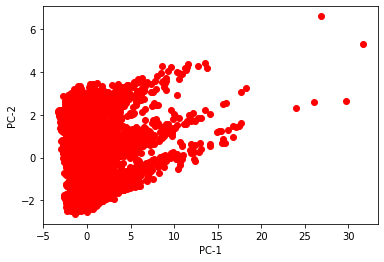

In [29]:
#scatter plot on PCA
plt.scatter(PCA_df['PC1'], PCA_df['PC2'], c ="red")
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.show()

In [30]:
pca.explained_variance_ratio_

array([0.30219005, 0.19698344])

In [31]:
pca.singular_values_

array([237.04201154, 191.38156701])

**Evaluation**

In [32]:
y_test=scaler_Y.inverse_transform(pd.DataFrame(y_test))
y_test=pd.DataFrame(y_test,columns=['median_house_value'])

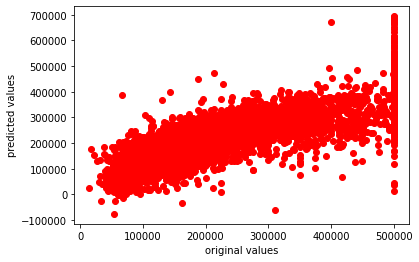

In [33]:
#scatter plot between original values VS. predicted values 
plt.scatter(y_test, y_preds, c ="red")
plt.xlabel("original values")
plt.ylabel("predicted values")
plt.show()

In [34]:
MAPE=sklearn.metrics.mean_absolute_percentage_error(y_test,y_preds)
RMSE=sklearn.metrics.mean_squared_error(y_test,y_preds,squared=False)
R2=sklearn.metrics.r2_score(y_test,y_preds)
res=pd.DataFrame({'MAPE':MAPE,'RMSE':RMSE,'R2':R2},index=['Linear Regression'])
res

,MAPE,RMSE,R2
Linear Regression,0.289434,68882.193137,0.640517


In [35]:
regression.coef_

array([[-0.45760021, -0.46294023,  0.12023611, -0.13766603,  0.37272   ,
        -0.36965619,  0.17737273,  0.65154383,  0.05212861, -0.10782408,
         0.02687438,  0.02152518,  0.05091257]])

In [36]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

**Discussion**

ANS:Q1

In [37]:
q1=pd.DataFrame({'columns':X_train.columns[:8],'coef':regression.coef_[0][:8]})
q1.sort_values(by=['coef'], ascending=False,inplace=True)
q1.reset_index(inplace=True)
q1.drop(columns=['index'],inplace=True)
arr=q1['columns'].values
arr

array(['median_income', 'total_bedrooms', 'households',
       'housing_median_age', 'total_rooms', 'population', 'longitude',
       'latitude'], dtype=object)

ANS:- ['median_income', 'total_bedrooms', 'households','housing_median_age', 'total_rooms', 'population', 'longitude','latitude']

ANS:Q2

In [38]:
result.sort_values(by=['Pearson Correlation'],ascending=False)

,Feature Name,Pearson Correlation
5,median_income,0.688355
1,total_rooms,0.133294
0,housing_median_age,0.106432
4,households,0.064894
2,total_bedrooms,0.049686
3,population,-0.025300


'median_income' is are highly correlated with the output also the most influential. For other features it can be observed that there is some difference in both the results.So we can not conclude to any conclusion for other feaures.

ANS:Q3

MAPE:- 

measures the average magnitude of error produced by a model, or how far 
off predictions are on average.

MAPE value lower than 20% is considered a good value.

We have 28% which is quit good MAPE score.

RMSE:-

It shows how far predictions fall from measured true values using Euclidean distance.

Usually, a RMSE score of less than 180 is considered a good score we have score which is far from good.


r2 score:-

the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

R-Squared above 0.7 would generally be seen as showing a high level of correlation, whereas a measure below 0.4 would show a low correlation. our score is also considered as good score.


ANS:Q4

It is important otherwise PCA will not be able to find the optimal Principal Components.

For instance, if a feature set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set. 

If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. 

Hence, principal components will be biased towards features with high variance, leading to false results.

PCA is affected by scale, so you need to scale the features in your data before applying PCA.
